# Regressão Linear em Python

Importa bibliotecas necessárias:

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(42)

Define o tamanho da amostra

In [2]:
nsample = 100

Cria um vetor do tamanho da amostra, igualmente espaçado entre 0 e 10

In [3]:
x = np.linspace(0, 10, nsample)

Cria um vetor, agora de 2 posição, onde a primeira agora é o próprio valor e a segunda ele ao quadrado.

In [4]:
X = np.column_stack((x, x**2))

Adiciona uma coluna de "1"s para ser a constante do modelo

In [5]:
X = sm.add_constant(X)

Define os coeficientes do modelo, isto é o modelo verdadeiro seria equivalente a:

$ y = 1 + 0.1x_1 + 10x_2 $

In [6]:
beta = np.array([1, 0.2, 10])

Cria um ruído branco gaussiano para não ser possível recuperar perfeitamente os coeficientes acima:

In [7]:
e = np.random.normal(size=nsample)*25

Calcula a variável resposta multiplicando as variáveis explicativas pelos seus coeficientes e adiciona o ruído

In [8]:
y = np.dot(X, beta) + e

Realiza a regressão:

In [9]:
model = sm.OLS(y, X)
results = model.fit()

Plota a linha da regressão e os pontos da variável resposta:

Text(0.5, 1.0, 'Regressão Linear')

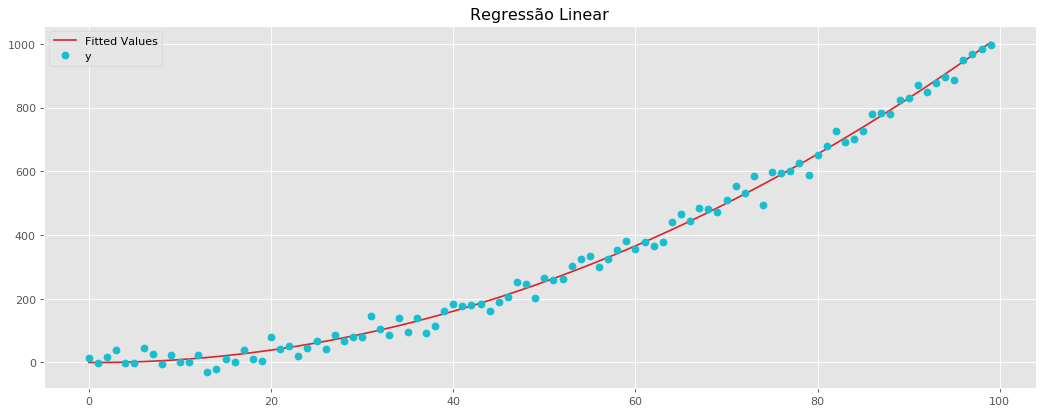

In [10]:
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(16,6), dpi = 80)
ax.plot(results.fittedvalues, label = "Fitted Values", c = "tab:red")
ax.plot(y, 'o', label = "y", c = "tab:cyan")
ax.legend()
ax.set_title("Regressão Linear")

Exibe a ficha os resultados da regressão

In [11]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     8789.
Date:                Sat, 09 May 2020   Prob (F-statistic):          2.30e-110
Time:                        14:40:12   Log-Likelihood:                -453.36
No. Observations:                 100   AIC:                             912.7
Df Residuals:                      97   BIC:                             920.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2969      6.726     -0.044      0.9

# Teoria

## Matemática da regressão Linear

A regressão linear, também chamada de quadrados mínimos (na melhor traduação, na maioria das fontes é traduzido como mínimos quadrados, *least squares* em inglês). Este método que visa minimizar a soma dos quadrados dos resíduos de uma reta fitada aos dados. Isto é:

$$\sum{\epsilon{}_i^2} = [\epsilon{}_1\epsilon{}_2...\epsilon{}_n]
\left[\begin{matrix}\epsilon{}_1\\\epsilon{}_2\\...\\\epsilon{}_n\\\end{matrix}\right]=\epsilon{}^\prime{}\epsilon{}$$

$^\prime{}$ denota a notação de matriz transposta.

Como:

$$\epsilon{}^\prime{}\epsilon{} = (Y-X\beta{})^\prime{}(Y-X\beta{})$$

Onde $Y$ é um vetor com a variável resposta, $X$ uma matriz com as variáveis resposta, $\beta{}$ os parâmetros do modelo.

Matricialmente a equação acima é o quadrado em matrizes.

$$\epsilon{}^\prime{}\epsilon{} = (Y-X\beta{})^\prime{}(Y-X\beta{}) = (Y-X\beta{})^2$$

Para achar o mínimo de funções basta derivar e igualar a zero, desta maneira, vamos derivar utilizando a [regra da cadeia](https://pt.wikipedia.org/wiki/Regra_da_cadeia):

$$\frac{\partial \beta{}}{\partial x}(Y-X\beta{})^2=-2X^\prime{}(Y-X\beta{})$$

Igualando a zero (no caso uma matriz de zeros):



$$-2X^\prime{}(Y-X\beta{})=0$$

$$-2X^\prime{}Y+2X^\prime{}X\beta{}=0$$

$$X^\prime{}Y=X^\prime{}X\beta{}$$

Por fim, "passar dividindo" em matrizes é multiplicar pela inversa:

$$ b=(X^\prime{}X)^{-1}X^\prime{}Y$$

Utilizando a equação no nosso exemplo acima:

In [12]:
np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)

array([-0.29690879, -1.28772654, 10.18325582])

## As Premissas da Regressão Linear Clássica

O livro do Peter Kennedy faz uma ótima revisão das premissas, detalhando quais problemas podem ocorrer se cada uma delas é quebrada, abaixo fazemos um resumo de cada uma:

+ A variável resposta deve ter uma relação linear com as variáveis explicativas;
+ Que os resíduos possuem mesma variancia e não são correlacionados um com o outro:
    + Heterocedasticidade, quando os resíduos não possuem mesma variância;
    + Erros não autocorrelacionados, quando os resíduos são correlacionados um com os outros;
+ Que as variáveis explicativas podem ser amostradas novamente com os mesmos valores, ou seja, que são livres de erros de medição;
+ Que o número de observações é maior do que o número de variáveis explicativas. Além disso, que não existe relação linear entre as variáveis explicativas.

Outra premissa importante, também muito utilizada, é a de normalidade dos resíduos. Alguns testes, como o Breusch-Pagan, que utilizaremos para testar a homocedasticidade dos resíduos, depende desta premissa.

Existem testes estatísticos para validar as hipóteses acima. Primeiramente vamos ao testa mais conhecido, que é a análise do P-Valor dos parâmetros do modelo. Nesta parte é importânte o conhecimento de teste de hipóteses, a Wikipédia possui um [artigo interessante](https://pt.wikipedia.org/wiki/Testes_de_hip%C3%B3teses) sobre o tema.

O teste de significância dos parâmetros do modelo testa a hipótese do beta da variável explicativa ser diferênte de zero, isto é:

+ Hipótese nula ($H_0$): O beta da variável explicativa é igual a 0;  
+ Hipótese alternativa ($H_1$): O beta da variável explicativa é diferente de 0.

Geralmente considerá-se que devemos remover todas as variáveis explicativas com P-Valor maior do que 0,05 do modelo, já que estatisticamente não podemos dizer que a variável é diferente de zero. A exceção é a constante, que, na maioria dos casos, devemos manter independentemente do P-Valor. Para mais detalhes do teste, o [Portal Action tem um excelente artigo sobre o tema](http://www.portalaction.com.br/analise-de-regressao/15-analise-de-variancia).

# Teste de Autocorrelação

Este teste é mais importante quando se fala de séries temporais. Imagine a crise do Covid-19 em relação a alguma métrica da economia, é esperado que os resíduos destes pontos sejam correlacionados entre si, já que um evento diferente aconteceu, onde nos demais pontos da série não.

Existem vários testes de hipótese para testar correlação serial, dentre eles:

+ [Breusch–Godfrey](https://en.wikipedia.org/wiki/Breusch%E2%80%93Godfrey_test);
+ [Durbin–Watson](https://en.wikipedia.org/wiki/Durbin%E2%80%93Watson_statistic);
+ [Ljung–Box test](https://en.wikipedia.org/wiki/Ljung%E2%80%93Box_test).

Meu favorito é o teste de [Breusch–Godfrey](http://www.real-statistics.com/multiple-regression/autocorrelation/breusch-godfrey-test/), pois também é possível utilizá-lo para modelos do tipo ARIMA, iremos falar destes modelos em uma próxima conversa.

O Breusch–Godfrey pode ser encontrado na próxima biblioteca StatsModels, sua documentação está [aqui](https://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.acorr_breusch_godfrey.html). As hipóteses de teste são:

+ Hipótese nula ($H_0$): Não existe correlação serial de ordem até "p" (que é escolhido por quem está utilizando o teste);  
+ Hipótese alternativa ($H_1$): Existe correlação serial de ao menos uma ordem até "p".

Desta maneira, não queremos descartar a hipótese nula, i.e., queremos um P-Valor maior do que 0,05.

In [13]:
bg_results = sm.stats.diagnostic.acorr_breusch_godfrey(results, nlags = 1)

In [14]:
{"Lagrange multiplier test statistic.":bg_results[0],
"The p-value for Lagrange multiplier test.":bg_results[1],
"The value of the f statistic for F test, alternative version of the same test based on F test for the parameter restriction.":bg_results[2],
"The pvalue for F test.":bg_results[3]}

{'Lagrange multiplier test statistic.': 0.0762423749165686,
 'The p-value for Lagrange multiplier test.': 0.7824557322045582,
 'The value of the f statistic for F test, alternative version of the same test based on F test for the parameter restriction.': 0.07324852633597133,
 'The pvalue for F test.': 0.7872453807108689}

Os papers originais que deram origem ao teste:

Breusch, T. S. (1978). "Testing for Autocorrelation in Dynamic Linear Models". Australian Economic Papers. 17: 334–355. - [DOI: 10.1111/j.1467-8454.1978.tb00635.x](https://doi.org/10.1111/j.1467-8454.1978.tb00635.x)

Godfrey, L. G. (1978). "Testing Against General Autoregressive and Moving Average Error Models when the Regressors Include Lagged Dependent Variables". Econometrica. 46: 1293–1301. - [DOI: 10.2307/1913829](https://doi.org/10.2307/1913829).

# Teste de Heterocedasticidade

A variância dos erros deve ser constante em todos os pontos, esta premissa é forte. Em muitos problemas tratados o erro percentual é constante, mas em valor absoluto não.

Em muitas séries é esperado que a variação percentual seja constante. Por exemplo, imagine uma série com o valor de fechamento da cotação do dólar, é esperado que quando o dólar estivesse custando R$ 2,00 exista um variação pequena, de digamos 5 centavos durante os diversos dias. Agora com o dólar na casa de R$ 6,00, não é esperado mais que varie 5 centavos, mas agora dizemos de 15 centamos. A variação percentual é a mesma, mas em absoluto não.

Em uma série heterocedástica, a variação é constante em todos os pontos, então se fosse de 15 centamos, seria tanto quando o dólar estivesse cotado a R$ 6,00, quando estava a R$ 1,00.

Exemplo da distribuição dos pontos em uma série homocedástica e heterocedástica:

Text(0.5, 1.0, 'Regressão Homocedástica')

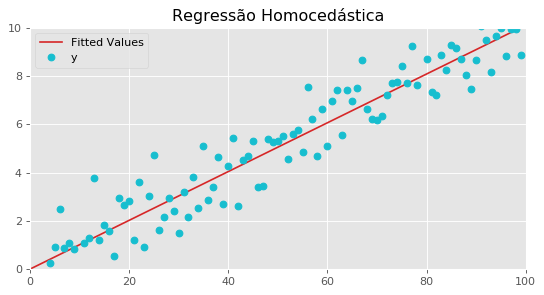

In [15]:
e = np.random.normal(size=nsample)

e_homocedastico = x + e

fig, ax = plt.subplots(figsize=(8,4), dpi = 80)
ax.plot(x, label = "Fitted Values", c = "tab:red")
ax.plot(e_homocedastico, 'o', label = "y", c = "tab:cyan")
ax.legend()
ax.set_ylim(0, 10)
ax.set_xlim(0, 100)
ax.set_title("Regressão Homocedástica")

Text(0.5, 1.0, 'Regressão Heterocedásticos')

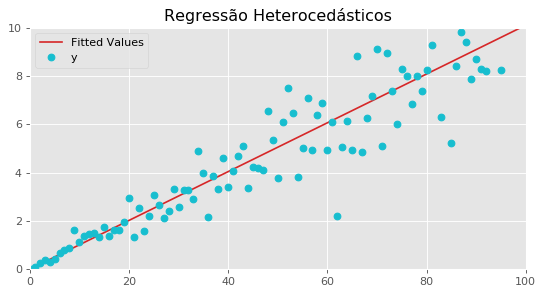

In [16]:
e = np.random.normal(size=nsample)

e_heterocedásticos = x+e*x*0.2
fig, ax = plt.subplots(figsize=(8,4), dpi = 80)
ax.plot(x, label = "Fitted Values", c = "tab:red")
ax.plot(e_heterocedásticos, 'o', label = "y", c = "tab:cyan")
ax.legend()
ax.set_ylim(0, 10)
ax.set_xlim(0, 100)
ax.set_title("Regressão Heterocedásticos")

Assim como o caso da autocorrelação, existem muitos possíveis testes.

Iremos utilizar o teste de Breuch-Pagan. Cujas hipóteses são:

+ Hipótese nula ($H_0$): Os resíduos são homocedásticos;  
+ Hipótese alternativa ($H_1$): Os resíduos são heterocedásticos.

In [17]:
bp_results = sm.stats.diagnostic.het_breuschpagan(results.resid, X)

In [18]:
{"Lagrange multiplier test statistic.":bp_results[0],
"The p-value for Lagrange multiplier test.":bp_results[1],
"f-statistic of the hypothesis that the error variance does not depend on x.":bp_results[2],
"The pvalue for F test.":bp_results[3]}

{'Lagrange multiplier test statistic.': 0.8267829969314633,
 'The p-value for Lagrange multiplier test.': 0.6614032937595083,
 'f-statistic of the hypothesis that the error variance does not depend on x.': 0.4043327075891413,
 'The pvalue for F test.': 0.6685416338208896}

Em ambos os testes, utilizando multiplicação de Lagrange ou a estatística F, os p-valores são de 0,66, logo não descartamos a hipótese nula, tendo evidencias para acreditar que a série é homocedástica. Por construção a séria é realmente homocedástica, já que o termo de erro utilizado é constante para todos os pontos.

Breusch, T. S.; Pagan, A. R. (1979). "A Simple Test for Heteroskedasticity and Random Coefficient Variation". Econometrica. 47 (5): 1287–1294. - [DOI: 10.2307/1911963](https://doi.org/10.2307/1911963).

# Normalidade dos resíduos

Aqui queremos verificar se os resíduos possuem distribuição normal. Uma as formas é graficamente, utilizando um [quantile-quantile plot (Q–Q plot)](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot) ou um histograma. Um detalhe importante é que como o ruído adicionado a nossos dados foram gerados com uma distribuição normal, nossos resíduos também devem ter tal distribuição.

Q-Q Plot

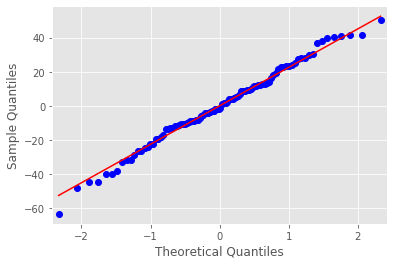

In [19]:
sm.qqplot(results.resid, line = 's')
plt.show()

Histograma

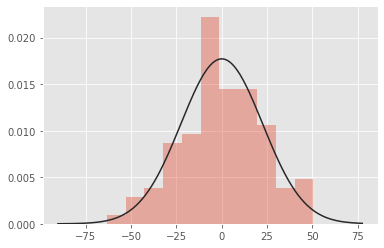

In [20]:
import seaborn as sns
from scipy.stats import norm

sns.distplot(results.resid, fit=norm, kde=False)

Também é possível fazer o mesmo com testes estatísticos, talvez os mais conhecidos sejam:

+ [Kolmogorov–Smirnov](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test);
+ [Shapiro–Wilk](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test);
+ [Jarque–Bera](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test).

As hipóteses do teste de Kolmogorov–Smirnov são: 

+ Hipótese nula ($H_0$): os dados advém de uma distribuição normal;  
+ Hipótese alternativa ($H_1$): os não dados advém de uma distribuição normal.

In [21]:
{'Estatística do teste:':sm.stats.lilliefors(results.resid)[0], 'P-Valor:':sm.stats.lilliefors(results.resid)[1]}

C:\Users\Ricardo\anaconda3\lib\site-packages\statsmodels\stats\_lilliefors.py:272: FutureWarning: The default pvalmethod will change from "approx" to "table" after 0.11. The "table" method uses values from a very large simulation and is more accurate.  Explicitly set this parameter to "approx" or "table" to silence this warning
  warnings.warn(msg, FutureWarning)


{'Estatística do teste:': 0.06219603145890426, 'P-Valor:': 0.4507665652992539}

O P-Valor foi de 0,45, logo não descartamos a hipótese nula. E a distribuição deve ser normal.

+ Como nossa série foi gerada artificialmente com uma distribuição normal, os resíduos terem distribuição normal é algo esperado;
+ Em uma série de resíduos com poucos pontos, a série pode claramente não ter uma distribuição normal, mas pode não ser possível descartar a hipótese nula de normalidade;
+ Conforme mais pontos são adicionados, o teste passa a poder descartar $H_0$. Desta maneira, o número de observações influencia o resultado do teste.

## Bibliografia:

O código da regressão foi baseado no exemplo da biblioteca:  
https://www.statsmodels.org/dev/examples/notebooks/generated/ols.html

[1] [Kennedy, Peter. A Guide to Econometrics.John Wiley and Sons Ltd, 2008.](https://www.amazon.com/Guide-Econometrics-6th-Peter-Kennedy/dp/1405182571)

[2] https://www.stat.purdue.edu/~boli/stat512/lectures/topic3.pdf